<a href="https://colab.research.google.com/github/BenjaminDKLuong/Colab_Notes/blob/master/Optimizing_with_batch_nomalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170500096/170498071 [==============================] - 44s 0us/step


In [0]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [0]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)


In [5]:
input_shape = X_train[0].shape

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=1)]


In [0]:
batch_size = 256
n_epochs = 300


In [8]:
history = model.fit(X_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs, verbose=1, 
                    validation_data=(X_val, y_val), 
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 13s 255us/step - loss: 1.8514 - acc: 0.3075 - val_loss: 1.5491 - val_acc: 0.4248
Epoch 2/300
50000/50000 [==============================] - 6s 112us/step - loss: 1.4057 - acc: 0.4849 - val_loss: 1.2154 - val_acc: 0.5608
Epoch 3/300
50000/50000 [==============================] - 6s 113us/step - loss: 1.1821 - acc: 0.5732 - val_loss: 1.0547 - val_acc: 0.6160
Epoch 4/300
50000/50000 [==============================] - 6s 112us/step - loss: 1.0301 - acc: 0.6311 - val_loss: 0.9518 - val_acc: 0.6623
Epoch 5/300
50000/50000 [==============================] - 6s 113us/step - loss: 0.9346 - acc: 0.6676 - val_loss: 0.8595 - val_acc: 0.6975
Epoch 6/300
50000/50000 [==============================] - 6s 113us/step - loss: 0.8534 - acc: 0.6988 - val_loss: 0.8581 - val_acc: 0.6955
Epoch 7/300
50000/50000 [==============================] - 6s 113us

# Model with BatchNormalization

In [9]:
model_bn = Sequential()

model_bn.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Flatten())
model_bn.add(Dense(512, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.5))
model_bn.add(Dense(128, activation='relu'))
model_bn.add(Dense(n_classes, activation='softmax'))

model_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [10]:
history_bn = model_bn.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(X_val, y_val), callbacks=callbacks)


Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 10s 194us/step - loss: 1.6558 - acc: 0.4239 - val_loss: 1.7074 - val_acc: 0.4462
Epoch 2/300
50000/50000 [==============================] - 8s 162us/step - loss: 1.1838 - acc: 0.5749 - val_loss: 1.0633 - val_acc: 0.6248
Epoch 3/300
50000/50000 [==============================] - 8s 165us/step - loss: 0.9567 - acc: 0.6587 - val_loss: 0.8732 - val_acc: 0.6981
Epoch 4/300
50000/50000 [==============================] - 8s 161us/step - loss: 0.8158 - acc: 0.7138 - val_loss: 0.7851 - val_acc: 0.7268
Epoch 5/300
50000/50000 [==============================] - 8s 161us/step - loss: 0.7321 - acc: 0.7404 - val_loss: 0.7354 - val_acc: 0.7476
Epoch 6/300
50000/50000 [==============================] - 8s 162us/step - loss: 0.6705 - acc: 0.7632 - val_loss: 0.7348 - val_acc: 0.7501
Epoch 7/300
50000/50000 [==============================] - 8s 160us/step - loss: 0.6192 - acc: 0.7819 - val_loss: 0

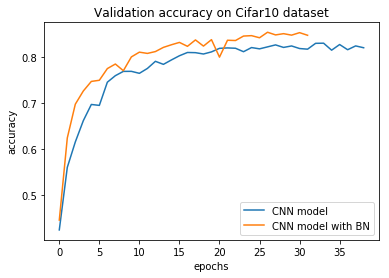

In [11]:
val_acc_bn = history_bn.history['val_acc']
val_acc = history.history['val_acc']
plt.plot(range(len(val_acc)), val_acc, label='CNN model')
plt.plot(range(len(val_acc_bn)), val_acc_bn, label='CNN model with BN')
plt.title('Validation accuracy on Cifar10 dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
print(max(val_acc_bn), max(val_acc))
print(len(val_acc_bn), len(val_acc))

0.8545 0.8307
32 39
